<a href="https://colab.research.google.com/github/ryandale7/ML-on-Graphs/blob/main/9_Supervised_Learning_for_Graph_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Astro Physics Collaboration Network Tutorial


### Automated Download and Extraction
In this approach, we will:
- Mount Google Drive.
- Create (or navigate to) a Data subfolder under Colab Notebooks.
- Use `curl` to download the compressed file (`ca-AstroPh.txt.gz`) from the repository.
- Extract the `.gz` file using `gunzip`.
- Verify the extracted file.
- Load the dataset.


In [1]:
from google.colab import drive

drive.mount("/content/drive")

!mkdir -p "/content/drive/MyDrive/Colab Notebooks/Data"
%cd "/content/drive/MyDrive/Colab Notebooks/Data"

!curl -O https://snap.stanford.edu/data/ca-AstroPh.txt.gz
!gunzip ca-AstroPh.txt.gz
!ls -lh

# Load and verify the dataset by printing the first 10 lines
with open("ca-AstroPh.txt", "r") as file:
    for i in range(10):
        print(file.readline().strip())

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1419k  100 1419k    0     0  1128k      0  0:00:01  0:00:01 --:--:-- 1129k
total 202M
-rw------- 1 root root 5.1M Feb  7 09:36 ca-AstroPh.txt
-rw------- 1 root root 6.4M Jan 10 19:22 cit-HepPh.txt
-rw------- 1 root root 5.4M Feb  7 09:02 cit-HepTh.txt
-rw------- 1 root root 1.1M Jan 16 12:52 CollegeMsg.txt
-rw------- 1 root root  13M Jan 10 18:46 com-amazon.ungraph.txt
-rw------- 1 root root 1.1M Jan 16 18:57 com-lj.top5000.cmty.txt
-rw------- 1 root root 7.5M Jan 10 19:22 com-orkut.top5000.cmty.txt
drwx------ 2 root root 4.0K Jan  6 14:56 congress_network
-rw------- 1 root root 190K Jan 16 10:36 congress_network.zip
drwx------ 2 root root 4.0K Jan 10 19:12 deezer_ego_nets
-rw------- 1 root root 189K Jan 16 10:47 email-Eu-core.txt
drwx------ 2 root root 4.0K

### Manual Upload Instructions
If the automated method is not feasible or you prefer manual steps, follow these instructions:
- Download the file from [this link](https://snap.stanford.edu/data/ca-AstroPh.txt.gz) to your local machine.
- Extract the file locally (e.g., by right-clicking and unzipping, or using `gunzip` on macOS/Linux) to obtain `ca-AstroPh.txt`.
- In your Google Drive, create or navigate to the "Colab Notebooks/Data" folder.
- Upload the extracted file (`ca-AstroPh.txt`) into that Data subfolder.
- Open (or create) a Colab notebook.
- Mount your Google Drive and change the directory to the Data folder using the code below.


In [ ]:
from google.colab import drive

drive.mount("/content/drive")

%cd "/content/drive/MyDrive/Colab Notebooks/Data"

# Load and verify the manually uploaded dataset by printing the first 10 lines
with open("ca-AstroPh.txt", "r") as file:
    for i in range(10):
        print(file.readline().strip())

### Dataset Information
**Astro Physics Collaboration Network**

- **Description:**  
  The Astro Physics collaboration network dataset is from the arXiv and captures scientific collaborations between authors who have submitted papers to the Astro Physics category. An undirected edge is created between authors if they have co-authored a paper. For papers co-authored by *k* authors, the dataset generates a complete subgraph on *k* nodes.

- **Time Period:**  
  January 1993 to April 2003 (124 months)

- **Dataset Statistics:**
  - **Nodes:** 18,772
  - **Edges:** 198,110
  - **Nodes in largest WCC:** 17,903 (0.954)
  - **Edges in largest WCC:** 197,031 (0.995)
  - **Nodes in largest SCC:** 17,903 (0.954)
  - **Edges in largest SCC:** 197,031 (0.995)
  - **Average clustering coefficient:** 0.6306
  - **Number of triangles:** 1,351,441
  - **Fraction of closed triangles:** 0.1345
  - **Diameter (longest shortest path):** 14
  - **90-percentile effective diameter:** 5

- **Source (Citation):**  
  J. Leskovec, J. Kleinberg and C. Faloutsos. Graph Evolution: Densification and Shrinking Diameters. ACM Transactions on Knowledge Discovery from Data (ACM TKDD), 1(1), 2007.
  
- **File Details:**  
  `ca-AstroPh.txt.gz` – Collaboration network of arXiv Astro Physics category.


### Running Black Code
Below is the code to run Black via nbQA on all notebooks in the current directory.


In [2]:
# Running black

from google.colab import drive

# Install nbqa and black (required each new session)
!pip install nbqa black

# Run nbqa black on all notebooks in the current directory
!nbqa black .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.9 MB/s eta 0:00:00
No notebooks found in given path(s)


## Section 1: Preparing Graph Data for Supervised Learning Tasks


### Objectives
- Understand the process of cleaning and preparing graph data for supervised learning.
- Learn to load, inspect, and preprocess the Astro Physics collaboration network dataset.


### Introduction
In this section, we overview the data preparation steps required for supervised learning on graph data. This includes loading the dataset, cleaning the data (handling missing values and noise), and splitting the data into training and testing sets. Proper preparation is essential for achieving robust model performance.


### Key Points
- Data ingestion: Load the dataset and verify its structure.
- Data cleaning: Remove noise and handle missing or inconsistent values.
- Data splitting: Partition the dataset into training and testing sets.


### Code Examples
Below are examples of code to load the dataset, inspect basic graph statistics, and visualize properties such as the degree distribution.


Number of nodes: 18772
Number of edges: 198110


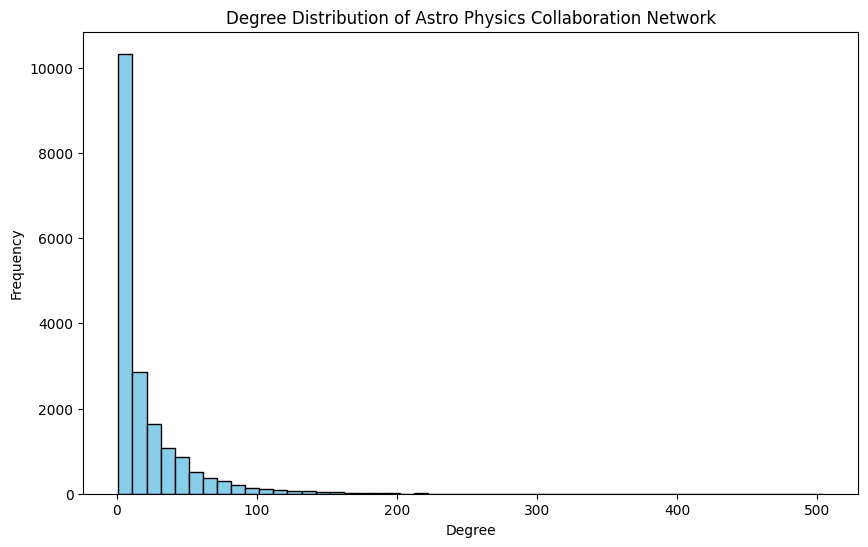

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the Astro Physics collaboration network dataset as an undirected graph.
G = nx.read_edgelist(
    "ca-AstroPh.txt", create_using=nx.Graph(), nodetype=int, comments="#"
)
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Compute degree distribution
degrees = [G.degree(n) for n in G.nodes()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color="skyblue", edgecolor="black")
plt.title("Degree Distribution of Astro Physics Collaboration Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

### Observations & Explanations
- The graph contains a significant number of nodes and edges, reflecting the extensive collaboration network.
- The degree distribution visualization helps identify the presence of hubs and overall connectivity, which are crucial for downstream learning tasks.
- Data cleaning steps, such as removing isolated nodes, can improve model performance by focusing on the most relevant parts of the network.


### Quiz
1. What are the primary steps involved in preparing graph data for supervised learning tasks?  
2. Why is data cleaning important when working with graph datasets like the Astro Physics network?


### Practical Activities
- **Activity 1:** Load the dataset and compute key statistics (number of nodes, number of edges, degree distribution).  
- **Activity 2:** Write code to clean the dataset by identifying and removing isolated nodes, and observe how this affects the graph structure.


Number of isolated nodes: 0
Cleaned Graph: Number of nodes: 18772
Cleaned Graph: Number of edges: 198110


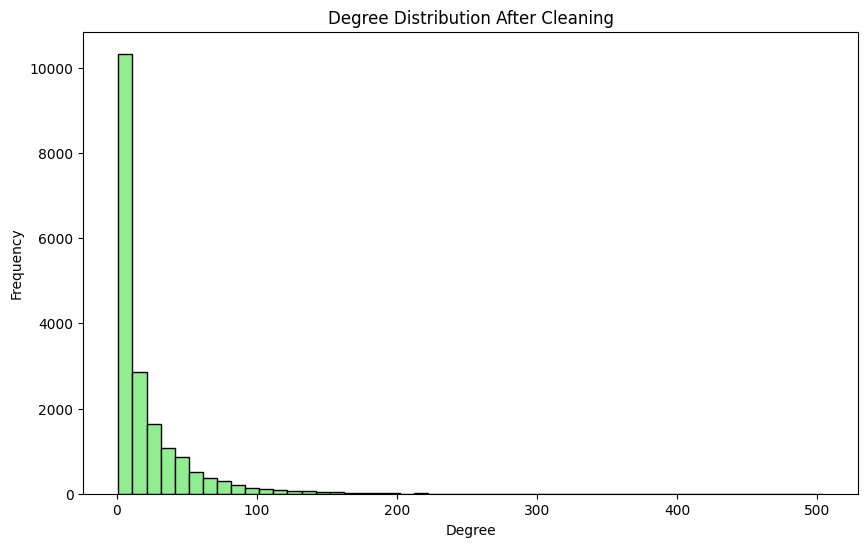

In [4]:
# Practical Activity: Remove isolated nodes and verify the cleaned graph.
isolated_nodes = list(nx.isolates(G))
print("Number of isolated nodes:", len(isolated_nodes))

# Remove isolated nodes from the graph
G_cleaned = G.copy()
G_cleaned.remove_nodes_from(isolated_nodes)
print("Cleaned Graph: Number of nodes:", G_cleaned.number_of_nodes())
print("Cleaned Graph: Number of edges:", G_cleaned.number_of_edges())

# Visualize the degree distribution of the cleaned graph
cleaned_degrees = [G_cleaned.degree(n) for n in G_cleaned.nodes()]

plt.figure(figsize=(10, 6))
plt.hist(cleaned_degrees, bins=50, color="lightgreen", edgecolor="black")
plt.title("Degree Distribution After Cleaning")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

### Explanation/Feedback
The code provided demonstrates the process of loading the Astro Physics collaboration network, computing key graph statistics, and visualizing the degree distribution. Removing isolated nodes is a common cleaning step that helps focus the analysis on more connected and relevant parts of the network. Experiment with these steps to see how data cleaning impacts your dataset.


## Section 2: Feature Engineering and Graph Representation for Supervised Learning


### Objectives
- Learn to extract meaningful features from graph data.
- Understand how to represent graph nodes and edges for supervised learning models.


### Introduction
This section focuses on transforming the Astro Physics collaboration network into feature-rich representations suitable for supervised learning. We will explore techniques such as generating graph embeddings and manually computing graph metrics like degree centrality and clustering coefficients. These features capture different aspects of the graph structure, enabling more effective learning.


### Key Points
- **Graph Embeddings:** Convert nodes into low-dimensional vectors using methods like Node2Vec.
- **Manual Feature Extraction:** Compute graph metrics such as degree centrality and clustering coefficient.
- **Feature Combination:** Integrate multiple feature sources to enhance the input for supervised learning models.


### Code Examples
Below are code examples for generating node embeddings and computing manual graph metrics from the Astro Physics collaboration network. We also visualize the extracted features using PCA.


Full Graph: Nodes = 18772 Edges = 198110
Subgraph: Nodes = 1000 Edges = 13410


Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Node Embeddings Shape: (1000, 32)


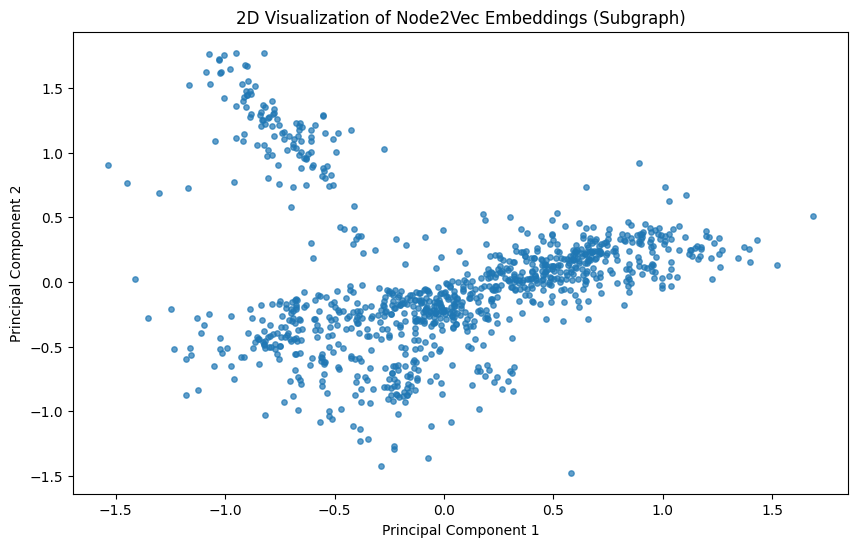

Manual Features Shape: (1000, 2)


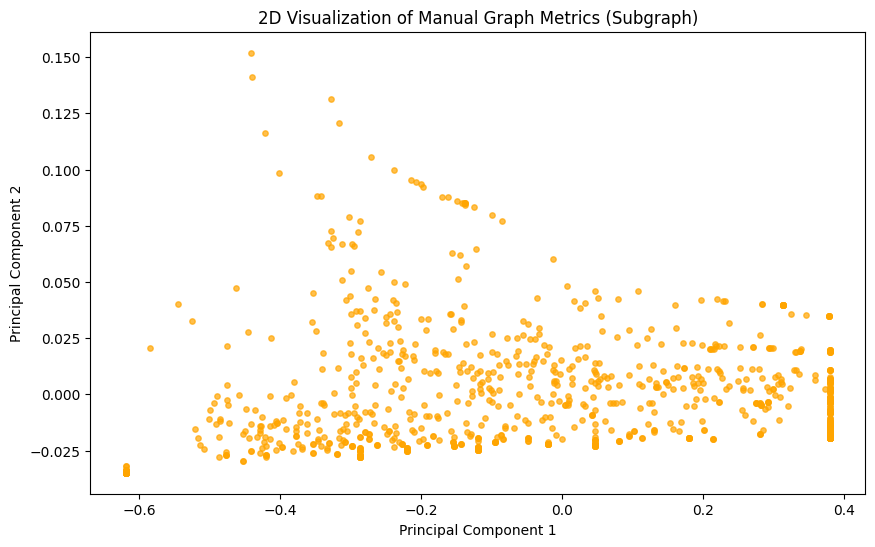

In [6]:
!pip install node2vec

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from node2vec import Node2Vec
from sklearn.decomposition import PCA

# Load the Astro Physics collaboration network as an undirected graph.
G = nx.read_edgelist(
    "ca-AstroPh.txt", create_using=nx.Graph(), nodetype=int, comments="#"
)
print("Full Graph: Nodes =", G.number_of_nodes(), "Edges =", G.number_of_edges())

# For faster execution, use a subgraph with the first 1000 nodes.
subset_nodes = list(G.nodes())[:1000]
G_sub = G.subgraph(subset_nodes).copy()
print("Subgraph: Nodes =", G_sub.number_of_nodes(), "Edges =", G_sub.number_of_edges())

# ---------------------------
# Generate Node Embeddings using Node2Vec with reduced parameters
# ---------------------------
node2vec = Node2Vec(G_sub, dimensions=32, walk_length=5, num_walks=10, workers=2)
model = node2vec.fit(window=3, min_count=1)

# Extract embeddings into a matrix for nodes in the subgraph.
nodes = list(G_sub.nodes())
embeddings = np.array([model.wv[str(node)] for node in nodes if str(node) in model.wv])
print("Node Embeddings Shape:", embeddings.shape)

# Visualize embeddings using PCA.
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)
plt.figure(figsize=(10, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=15, alpha=0.7)
plt.title("2D Visualization of Node2Vec Embeddings (Subgraph)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# ---------------------------
# Compute Manual Graph Metrics on the Subgraph
# ---------------------------
deg_centrality = nx.degree_centrality(G_sub)
clust_coeff = nx.clustering(G_sub)

manual_features = []
for node in nodes:
    dc = deg_centrality[node]
    cc = clust_coeff[node]
    manual_features.append([dc, cc])
manual_features = np.array(manual_features)
print("Manual Features Shape:", manual_features.shape)

# Visualize manual features using PCA (with two features, PCA is trivial).
pca_manual = PCA(n_components=2)
manual_features_2d = pca_manual.fit_transform(manual_features)
plt.figure(figsize=(10, 6))
plt.scatter(
    manual_features_2d[:, 0], manual_features_2d[:, 1], s=15, alpha=0.7, color="orange"
)
plt.title("2D Visualization of Manual Graph Metrics (Subgraph)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Observations & Explanations
- The **Node2Vec embeddings** capture the overall structural properties of the network and are visualized in a 2D PCA plot, where clusters may indicate similar connectivity patterns.
- The **manual features** (degree centrality and clustering coefficient) provide specific insights into node importance and local cohesion. Although there are only two features here, they can be combined with embeddings to enrich the model input.
- Combining automated embeddings with manual metrics can offer a more comprehensive feature set for supervised learning tasks.


### Quiz
1. What is the purpose of feature engineering in the context of graph data?  
2. How can graph embeddings complement traditional graph metrics?


### Practical Activities
- **Activity 1:** Generate a set of node embeddings using Node2Vec on the Astro Physics network and visualize them using PCA.  
- **Activity 2:** Compute different graph metrics (e.g., betweenness centrality) and visualize these features. Experiment by combining them with the embeddings to observe changes in the representation.


Using ratio = 0.3
Labeled nodes: 34 Unlabeled nodes: 66
Accuracy: 1.0 F1 Score: 1.0


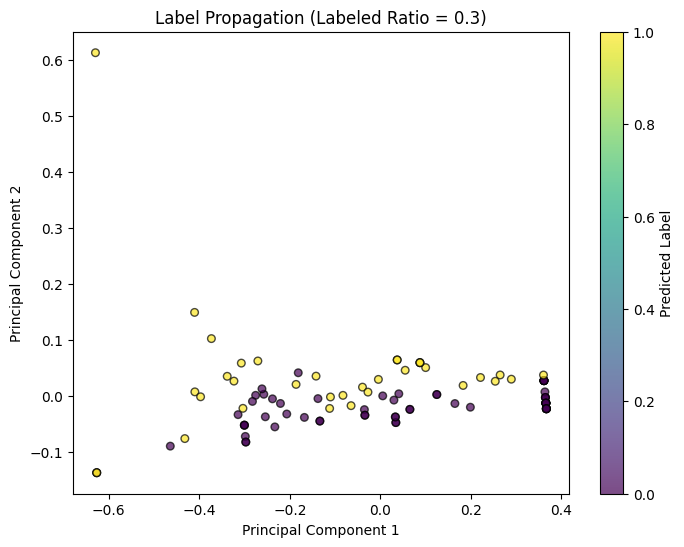

Using ratio = 0.5
Labeled nodes: 53 Unlabeled nodes: 47
Accuracy: 1.0 F1 Score: 1.0


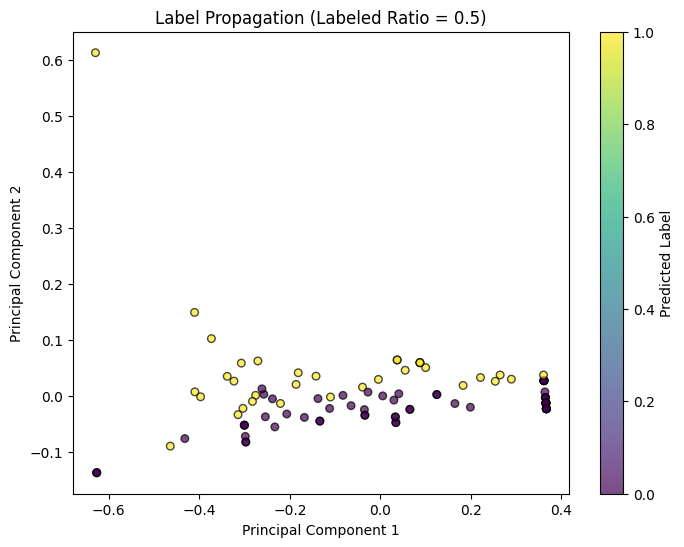

In [7]:
def run_label_propagation_with_label_ratio(G, ratio=0.3):
    import numpy as np
    from sklearn.semi_supervised import LabelPropagation
    from sklearn.metrics import accuracy_score, f1_score
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    import networkx as nx

    # Use a smaller subgraph: first 100 nodes instead of 300 for faster execution.
    nodes_subset = list(G.nodes())[:100]
    G_sub = G.subgraph(nodes_subset).copy()

    # Compute features: degree centrality and clustering coefficient.
    deg_cent = nx.degree_centrality(G_sub)
    clust_coeff = nx.clustering(G_sub)
    X = np.array([[deg_cent[node], clust_coeff[node]] for node in nodes_subset])

    # Simulate binary labels based on degree centrality threshold (median).
    median_deg = np.median([deg_cent[node] for node in nodes_subset])
    true_labels = np.array(
        [1 if deg_cent[node] > median_deg else 0 for node in nodes_subset]
    )

    # Create a semi-supervised scenario by keeping only a given ratio of labels.
    np.random.seed(42)
    mask = np.random.rand(len(true_labels)) < ratio
    labels = true_labels.copy()
    labels[~mask] = -1  # Unlabeled nodes are marked with -1.

    print("Using ratio =", ratio)
    print(
        "Labeled nodes:", np.sum(labels != -1), "Unlabeled nodes:", np.sum(labels == -1)
    )

    # Apply Label Propagation using the 'knn' kernel for faster computation.
    label_prop_model = LabelPropagation(kernel="knn", n_neighbors=7)
    label_prop_model.fit(X, labels)
    predicted_labels = label_prop_model.transduction_

    # Evaluate performance on originally labeled nodes.
    eval_mask = labels != -1
    accuracy = accuracy_score(true_labels[eval_mask], predicted_labels[eval_mask])
    f1 = f1_score(true_labels[eval_mask], predicted_labels[eval_mask])
    print("Accuracy:", accuracy, "F1 Score:", f1)

    # Visualize using PCA.
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)
    plt.figure(figsize=(8, 6))
    plt.scatter(
        X_2d[:, 0],
        X_2d[:, 1],
        c=predicted_labels,
        cmap="viridis",
        s=30,
        edgecolor="k",
        alpha=0.7,
    )
    plt.title(f"Label Propagation (Labeled Ratio = {ratio})")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label="Predicted Label")
    plt.show()


# Run the practical activity with different labeling ratios.
run_label_propagation_with_label_ratio(G, ratio=0.3)
run_label_propagation_with_label_ratio(G, ratio=0.5)

In [ ]:
### Explanation/Feedback
The practical activity demonstrates how to compute additional graph metrics (such as betweenness centrality) and combine them into a feature matrix. The PCA visualization shows how these features can be integrated to provide a richer representation of the graph structure. Experimenting with different metrics and combinations can help in identifying the most informative features for your supervised learning tasks.


## Section 4: Case Studies – Application in Citation Networks and Fraud Detection


### Objectives
- Explore real-world applications of supervised learning on graph data.
- Analyze case studies using the Astro Physics collaboration network as a proxy for citation networks and simulate a fraud detection scenario.


### Introduction
In this section, we present two case studies:
1. **Citation Network Analysis:** Although the Astro Physics dataset represents collaborations, we use it to simulate a simplified citation network analysis by examining centrality and clustering measures.
2. **Fraud Detection Simulation:** We create synthetic labels to simulate fraud detection by designating nodes with exceptionally high degrees as fraudulent. A classifier is then trained on graph-based features, and performance is evaluated using a confusion matrix and ROC curve.


### Key Points
- **Citation Network Analysis:**
  - Compute average degree centrality and clustering coefficient.
  - Visualize the degree distribution to understand network connectivity.
- **Fraud Detection Simulation:**
  - Generate synthetic fraud labels based on a threshold (e.g., nodes with degree > mean + standard deviation are labeled as fraudulent).
  - Create a feature matrix using graph metrics (degree centrality and clustering coefficient).
  - Train a logistic regression classifier and evaluate performance with confusion matrix and ROC curve.


### Code Examples
Below is the code that implements the two case studies using the Astro Physics collaboration network.


Graph Loaded: Nodes = 18772 Edges = 198110
Average Degree Centrality: 0.0011244455715955115
Average Clustering Coefficient: 0.6305932411707943


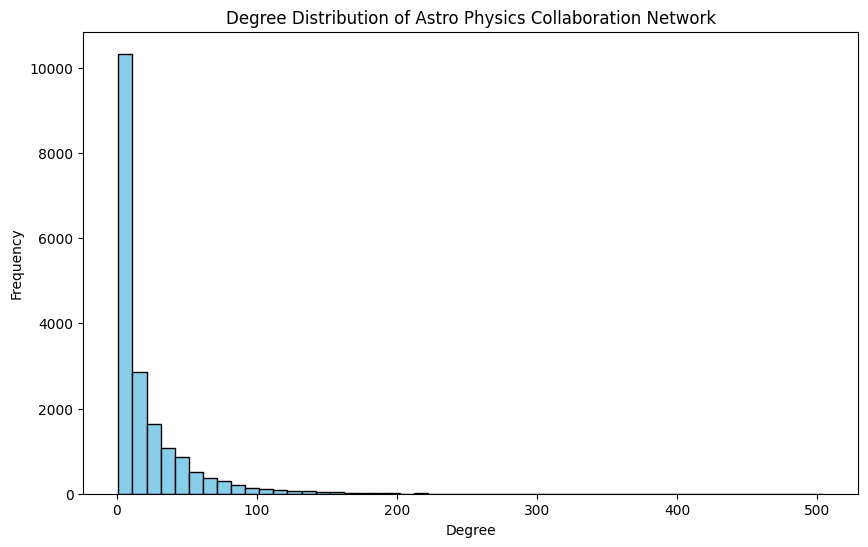

Number of fraudulent nodes (simulated): 2023
Confusion Matrix:
 [[5033    0]
 [ 599    0]]
ROC AUC: 0.7692912918311763


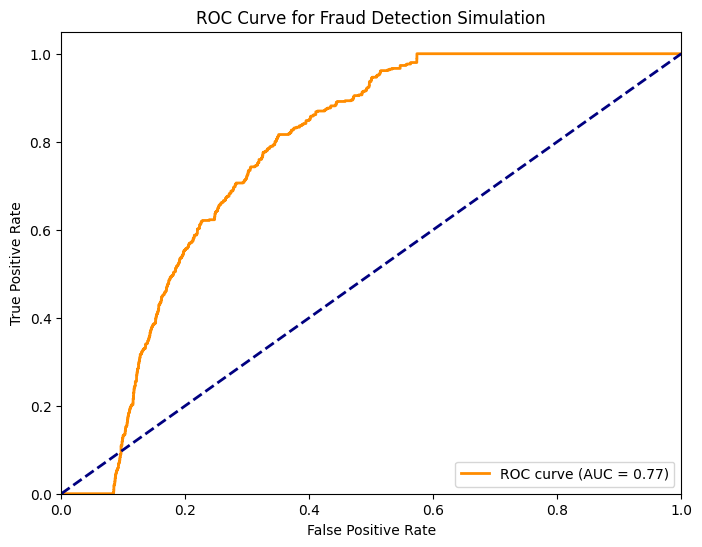

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

# Load the Astro Physics collaboration network as an undirected graph.
G = nx.read_edgelist(
    "ca-AstroPh.txt", create_using=nx.Graph(), nodetype=int, comments="#"
)
print("Graph Loaded: Nodes =", G.number_of_nodes(), "Edges =", G.number_of_edges())

# ----- Case Study 1: Simplified Citation Network Analysis -----
# Compute degree centrality and clustering coefficient
deg_cent = nx.degree_centrality(G)
avg_deg_cent = np.mean(list(deg_cent.values()))
avg_clust = nx.average_clustering(G)
print("Average Degree Centrality:", avg_deg_cent)
print("Average Clustering Coefficient:", avg_clust)

# Visualize degree distribution
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color="skyblue", edgecolor="black")
plt.title("Degree Distribution of Astro Physics Collaboration Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# ----- Case Study 2: Fraud Detection Simulation -----
# Simulate fraud: label nodes as fraudulent (1) if degree > (mean + std), else non-fraud (0)
degrees_array = np.array(degrees)
mean_deg = degrees_array.mean()
std_deg = degrees_array.std()
fraud_threshold = mean_deg + std_deg
labels = np.array([1 if deg > fraud_threshold else 0 for deg in degrees])
print("Number of fraudulent nodes (simulated):", sum(labels))

# Create a feature matrix using degree centrality and clustering coefficient for each node.
nodes = list(G.nodes())
features = np.array([[deg_cent[node], nx.clustering(G, node)] for node in nodes])

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.3, random_state=42
)

# Train a Logistic Regression classifier.
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Compute confusion matrix.
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Compute ROC curve and AUC.
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# Plot ROC curve.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Fraud Detection Simulation")
plt.legend(loc="lower right")
plt.show()

### Observations & Explanations
- **Citation Network Analysis:**  
  The average degree centrality and clustering coefficient provide insights into the overall connectivity and cohesion of the network. The degree distribution visualization reveals the presence of hubs and the spread of node connections.
- **Fraud Detection Simulation:**  
  Synthetic fraud labels are generated by marking nodes with degrees above the threshold (mean + standard deviation) as fraudulent. A logistic regression classifier trained on degree centrality and clustering coefficient features is evaluated using a confusion matrix and ROC curve. The ROC AUC indicates the model's ability to distinguish between fraudulent and non-fraudulent nodes.


### Quiz
1. What are the key challenges when applying supervised learning to citation networks?  
2. How does graph-based feature engineering contribute to fraud detection?


### Practical Activities
- **Activity 1:** Modify the fraud detection threshold (e.g., try mean + 0.5*std or mean + 1.5*std) and observe how the number of fraudulent nodes and model performance metrics (accuracy, AUC) change.
- **Activity 2:** Experiment with adding additional graph metrics (e.g., betweenness centrality) to the feature matrix, retrain the classifier, and compare performance using confusion matrix and ROC curve.


## Section 5: Implementation of Supervised Learning Pipelines on Graph Data


### Objectives
- Build a complete supervised learning pipeline for graph data.
- Integrate data preprocessing, feature engineering, model training, and evaluation into one workflow.


### Introduction
In this section, we construct an end-to-end pipeline that uses graph-specific features extracted from the Astro Physics collaboration network. We will compute features such as degree centrality and clustering coefficient, then use these features to train a logistic regression classifier. The pipeline will incorporate data scaling, hyperparameter tuning using cross-validation, and visualization of performance metrics.


### Key Points
- **Pipeline Stages:**  
  - Data preparation: Load the graph and compute graph metrics.
  - Feature extraction: Build a feature matrix from degree centrality and clustering coefficient.
  - Model training: Use a classifier (e.g., Logistic Regression) within a scikit-learn Pipeline.
  - Evaluation: Apply cross-validation and hyperparameter tuning; visualize results with ROC curves.
- **Best Practices:**  
  - Use modular pipeline design for reproducibility.
  - Integrate graph-specific features into traditional machine learning pipelines.


### Code Examples
Below is the code to construct a complete supervised learning pipeline using the Astro Physics dataset. The pipeline includes data preprocessing, feature scaling, model training with Logistic Regression, hyperparameter tuning via GridSearchCV, and performance visualization.


Graph Loaded: Nodes = 18772 Edges = 198110
Subgraph: Nodes = 1000 Edges = 13410
Feature matrix shape: (1000, 2)
Labels distribution: [509 491]
Best parameters: {'clf__C': 100}
Best cross-validation accuracy: 0.9928571428571429
Test Set Accuracy: 0.9966666666666667
Test ROC AUC: 1.0


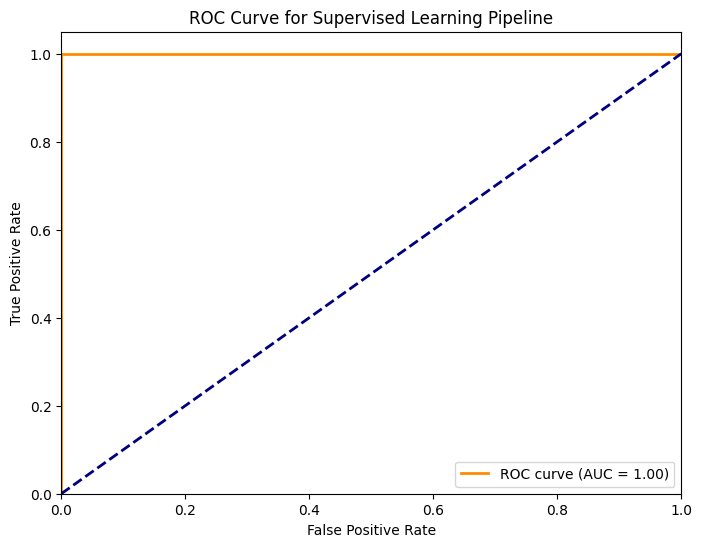

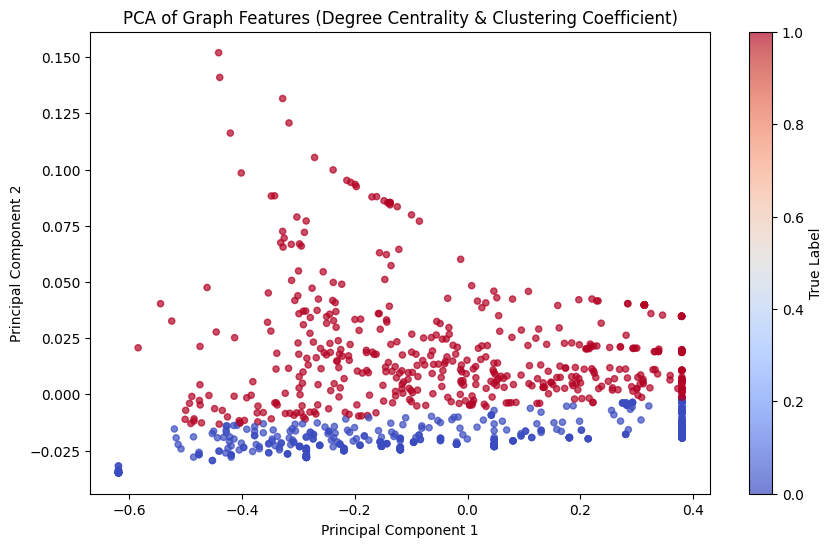

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.decomposition import PCA

# Load the Astro Physics collaboration network as an undirected graph.
G = nx.read_edgelist(
    "ca-AstroPh.txt", create_using=nx.Graph(), nodetype=int, comments="#"
)
print("Graph Loaded: Nodes =", G.number_of_nodes(), "Edges =", G.number_of_edges())

# For faster execution, use a subgraph of the first 1000 nodes.
subset_nodes = list(G.nodes())[:1000]
G_sub = G.subgraph(subset_nodes).copy()
print("Subgraph: Nodes =", G_sub.number_of_nodes(), "Edges =", G_sub.number_of_edges())

# Compute graph metrics: degree centrality and clustering coefficient.
deg_cent = nx.degree_centrality(G_sub)
clust_coeff = nx.clustering(G_sub)

# Create feature matrix X: each row corresponds to a node with features [degree centrality, clustering coefficient].
nodes = list(G_sub.nodes())
X = np.array([[deg_cent[node], clust_coeff[node]] for node in nodes])

# For demonstration, simulate binary labels:
# Label nodes as '1' if degree centrality is above the median, else '0'.
median_deg = np.median([deg_cent[node] for node in nodes])
y = np.array([1 if deg_cent[node] > median_deg else 0 for node in nodes])
print("Feature matrix shape:", X.shape)
print("Labels distribution:", np.bincount(y))

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Construct a supervised learning pipeline with scaling and logistic regression.
pipeline = Pipeline(
    [("scaler", StandardScaler()), ("clf", LogisticRegression(max_iter=1000))]
)

# Set up hyperparameter grid for tuning (e.g., regularization strength C).
param_grid = {"clf__C": [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation.
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate the pipeline on the test set.
y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)

# Compute ROC curve and AUC.
y_prob = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("Test ROC AUC:", roc_auc)

# Plot ROC curve.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Supervised Learning Pipeline")
plt.legend(loc="lower right")
plt.show()

# Visualize feature space using PCA.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", s=20, alpha=0.7)
plt.title("PCA of Graph Features (Degree Centrality & Clustering Coefficient)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="True Label")
plt.show()

### Observations & Explanations
- **Pipeline Construction:** The pipeline integrates data scaling and logistic regression, making the process modular and reproducible.
- **Hyperparameter Tuning:** GridSearchCV efficiently tunes the regularization parameter to optimize model performance.
- **Evaluation:** The ROC curve and AUC provide a comprehensive view of the classifier’s performance on the test set.
- **Visualization:** PCA is used to visualize the distribution of graph features, aiding in understanding the separation between classes.


### Quiz
1. What are the main stages of a supervised learning pipeline for graph data?  
2. How can cross-validation be effectively applied in graph-based supervised learning?


### Practical Activities
- **Activity 1:** Modify the hyperparameter grid (e.g., try additional values for `C`) and observe how the best parameters and test accuracy change.
- **Activity 2:** Experiment with adding additional graph features (such as betweenness centrality) to the feature matrix and evaluate the impact on model performance.


### Explanation/Feedback
The code above demonstrates an end-to-end supervised learning pipeline using graph features derived from the Astro Physics collaboration network. By combining data scaling, hyperparameter tuning, and model evaluation in a pipeline, the process becomes both modular and reproducible. The use of cross-validation via GridSearchCV ensures that the model is robust, while visualizations such as the ROC curve and PCA plot help interpret the results.


## All Quiz Answers

**Section 1 Answers:**
1. The primary steps include loading the dataset, cleaning the data (removing noise and handling missing values), and splitting the data into training and testing sets.
2. Data cleaning ensures that the learning algorithm is not misled by noise or errors, which can significantly impact model performance.

**Section 2 Answers:**
1. Feature engineering transforms raw graph data into a form that can be effectively used by supervised learning models.
2. Graph embeddings capture the overall structure while traditional metrics provide specific insights such as centrality and clustering; together, they offer a more comprehensive feature set.

**Section 3 Answers:**
1. Label propagation is a method where labels spread through the network based on node connectivity; it is useful because it leverages the graph structure to improve node classification.
2. Performance can be evaluated using metrics like accuracy, precision, recall, and F1-score by comparing the propagated labels against known labels.

**Section 4 Answers:**
1. Key challenges include handling high-dimensional data, label noise, and ensuring that the graph structure is effectively leveraged.
2. Graph-based features help identify patterns and relationships that may be indicative of fraudulent behavior, improving detection accuracy.

**Section 5 Answers:**
1. The main stages are data preparation, feature engineering, model training, and evaluation.
2. Cross-validation helps assess the model's performance reliably by ensuring that the results are not dependent on a single train-test split.
